##### Sorbonne Université, Deep Leaning Project, Mars 2020 : Charly Nana Konguep

# COMPUTER VISION PROJECT

# Image classification with Tensorflow and Keras

## Introduction 

In this project, we are interested in the classification of images into two classes. The images of the study are images of the real world, complex to classify, because all the images do not have the same size, the same shape, they are not monochrome or even centered. In addition, on some images, we observe humans and various backgrounds: which complicates the task of classification for the models.

The database consists of 3000 image files divided into two folders. A `cats` folder made up of 1500 cat images and a` dogs` folder made up of 1500 dog images. 

## Project Structure

**Task #1**: Import Libraries and Data Preprocessing

**Task #2**: Visualize Examples

**Task #3**: Create model from scratch

**Task #4**: Data Preprocessing : Build Image Data Generator

**Task #5**: Train Model

**Task #6**: Visualization of the Accuracy and Loss 

**Task #7**: Data Augmentation and Re-training of the model

**Task #8**: Transfert Learning with Data Augmentation

**Task #9**: Assess the performance of the trained model


## Task #1 : Import Libraries and Data Preprocessing

+ Import cats_vs_dogs dataset
+ Split the dataset into training and validation data.
+ Randomly shuffling the newly created subset


#### Import cats_vs_dogs dataset

In [3]:
import os
import random
import shutil
from shutil import copyfile

CAT_SOURCE_DIR = os.path.join('./cats/')
DOG_SOURCE_DIR = os.path.join('./dogs/')

print('Total cats images :',len(os.listdir(CAT_SOURCE_DIR)))
print('Total dogs images :', len(os.listdir(DOG_SOURCE_DIR)))

Total cats images : 1500
Total dogs images : 1500


#### Data Splitting

In [4]:
# We use os.mkdir to create our directories.
# We need two directories for training and testing, and subdirectories for cats and dogs.
try:
    os.mkdir('./training/')
    os.mkdir('./training/cats/')
    os.mkdir('./training/dogs/')
    
    os.mkdir('./testing/')
    os.mkdir('./testing/cats/')
    os.mkdir('./testing/dogs/')

except OSError:
    pass

# Directories for training data
TRAINING_DIR = os.path.join('./training/')

# Directories for testing data
TESTING_DIR = os.path.join('./testing/')

# Subdirectories for training data
TRAINING_CATS_DIR = os.path.join('./training/cats/')
TRAINING_DOGS_DIR = os.path.join('./training/dogs/')

# Subdirectories for testing data
TESTING_CATS_DIR = os.path.join('./testing/cats/')
TESTING_DOGS_DIR = os.path.join('./testing/dogs/')

In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE = 0.8):
    """
    Splitting data for training and testing data.
    
    - SOURCE : directory containing the files (cats or dogs)
    - TRAINING : Directory in which a portion of the SOURCE file will be copied. 
    - TESTING : Directory where the rest of the SOURCE file will be copied. 
    - SPLIT SIZE : real between 0 and 1, to determine the portion that will be copied in TRAINING and the rest in TESTING
    
    """
    file_names = os.listdir(SOURCE)
    file_names_shuffle = random.sample(file_names, len(file_names))
    n = int(len(file_names) * SPLIT_SIZE)
    training_list = file_names_shuffle[:n]
    testing_list = file_names_shuffle[n:]
    
    for file1 in training_list:
        shutil.copyfile(os.path.join(SOURCE, file1), os.path.join(TRAINING, file1))
        
    for file2 in testing_list:
        shutil.copyfile(os.path.join(SOURCE, file2), os.path.join(TESTING, file2))
        
# We split data    
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, SPLIT_SIZE = 0.9)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, SPLIT_SIZE = 0.9)

print('Total training cats :', len(os.listdir(TRAINING_CATS_DIR)))
print('Total training dogs :', len(os.listdir(TRAINING_DOGS_DIR)))

print('Total testing cats :', len(os.listdir(TESTING_CATS_DIR)))
print('Total testing dogs :', len(os.listdir(TESTING_DOGS_DIR)))

Total training cats : 1350
Total training dogs : 1350
Total testing cats : 150
Total testing dogs : 150


In [8]:
os.listdir(TRAINING_DIR)

['cats', 'dogs']

In [9]:
os.listdir(os.path.join(TRAINING_DIR, 'dogs'))[ : 10]

['dog.0.jpg',
 'dog.1.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.107.jpg',
 'dog.11.jpg']

In [10]:
os.listdir(os.path.join(TRAINING_DIR, 'cats'))[ : 10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.101.jpg',
 'cat.102.jpg',
 'cat.103.jpg',
 'cat.104.jpg',
 'cat.105.jpg',
 'cat.106.jpg']

In [6]:
# Check the number of images in the dataset
train_file_path = []
label_names = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in  os.listdir(TRAINING_DIR):
  train_class = os.listdir(os.path.join(TRAINING_DIR, i))
  for j in train_class:
    img = os.path.join(TRAINING_DIR, i, j)
    train_file_path.append(img)
    label_names.append(i)

print('Number of train images : {} \n'.format(len(train_file_path)))

Number of train images : 2700 



In [13]:
train_file_path[ :10]

['./training/cats\\cat.0.jpg',
 './training/cats\\cat.1.jpg',
 './training/cats\\cat.10.jpg',
 './training/cats\\cat.100.jpg',
 './training/cats\\cat.101.jpg',
 './training/cats\\cat.102.jpg',
 './training/cats\\cat.103.jpg',
 './training/cats\\cat.104.jpg',
 './training/cats\\cat.105.jpg',
 './training/cats\\cat.106.jpg']

In [15]:
label_names[ :10]

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats']

In [7]:
# Create Dataframe
import pandas as pd
df = pd.DataFrame({'Images': train_file_path,'Labels': label_names})
df

Images Labels
0       ./training/cats\cat.0.jpg   cats
1       ./training/cats\cat.1.jpg   cats
2      ./training/cats\cat.10.jpg   cats
3     ./training/cats\cat.100.jpg   cats
4     ./training/cats\cat.102.jpg   cats
...                           ...    ...
2695  ./training/dogs\dog.994.jpg   dogs
2696  ./training/dogs\dog.995.jpg   dogs
2697  ./training/dogs\dog.996.jpg   dogs
2698  ./training/dogs\dog.998.jpg   dogs
2699  ./training/dogs\dog.999.jpg   dogs

[2700 rows x 2 columns]

<AxesSubplot:ylabel='count'>

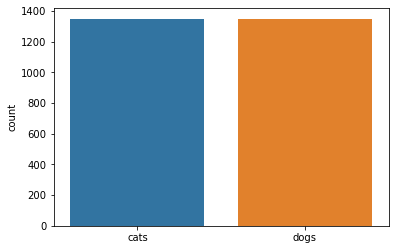

In [18]:
import seaborn as sns

sns.countplot(x = label_names)

## Task #2: Visualize Examples

+ Plotting randomly selected examples of a given set.
+ We look at some examples from training and test set along with their labels.

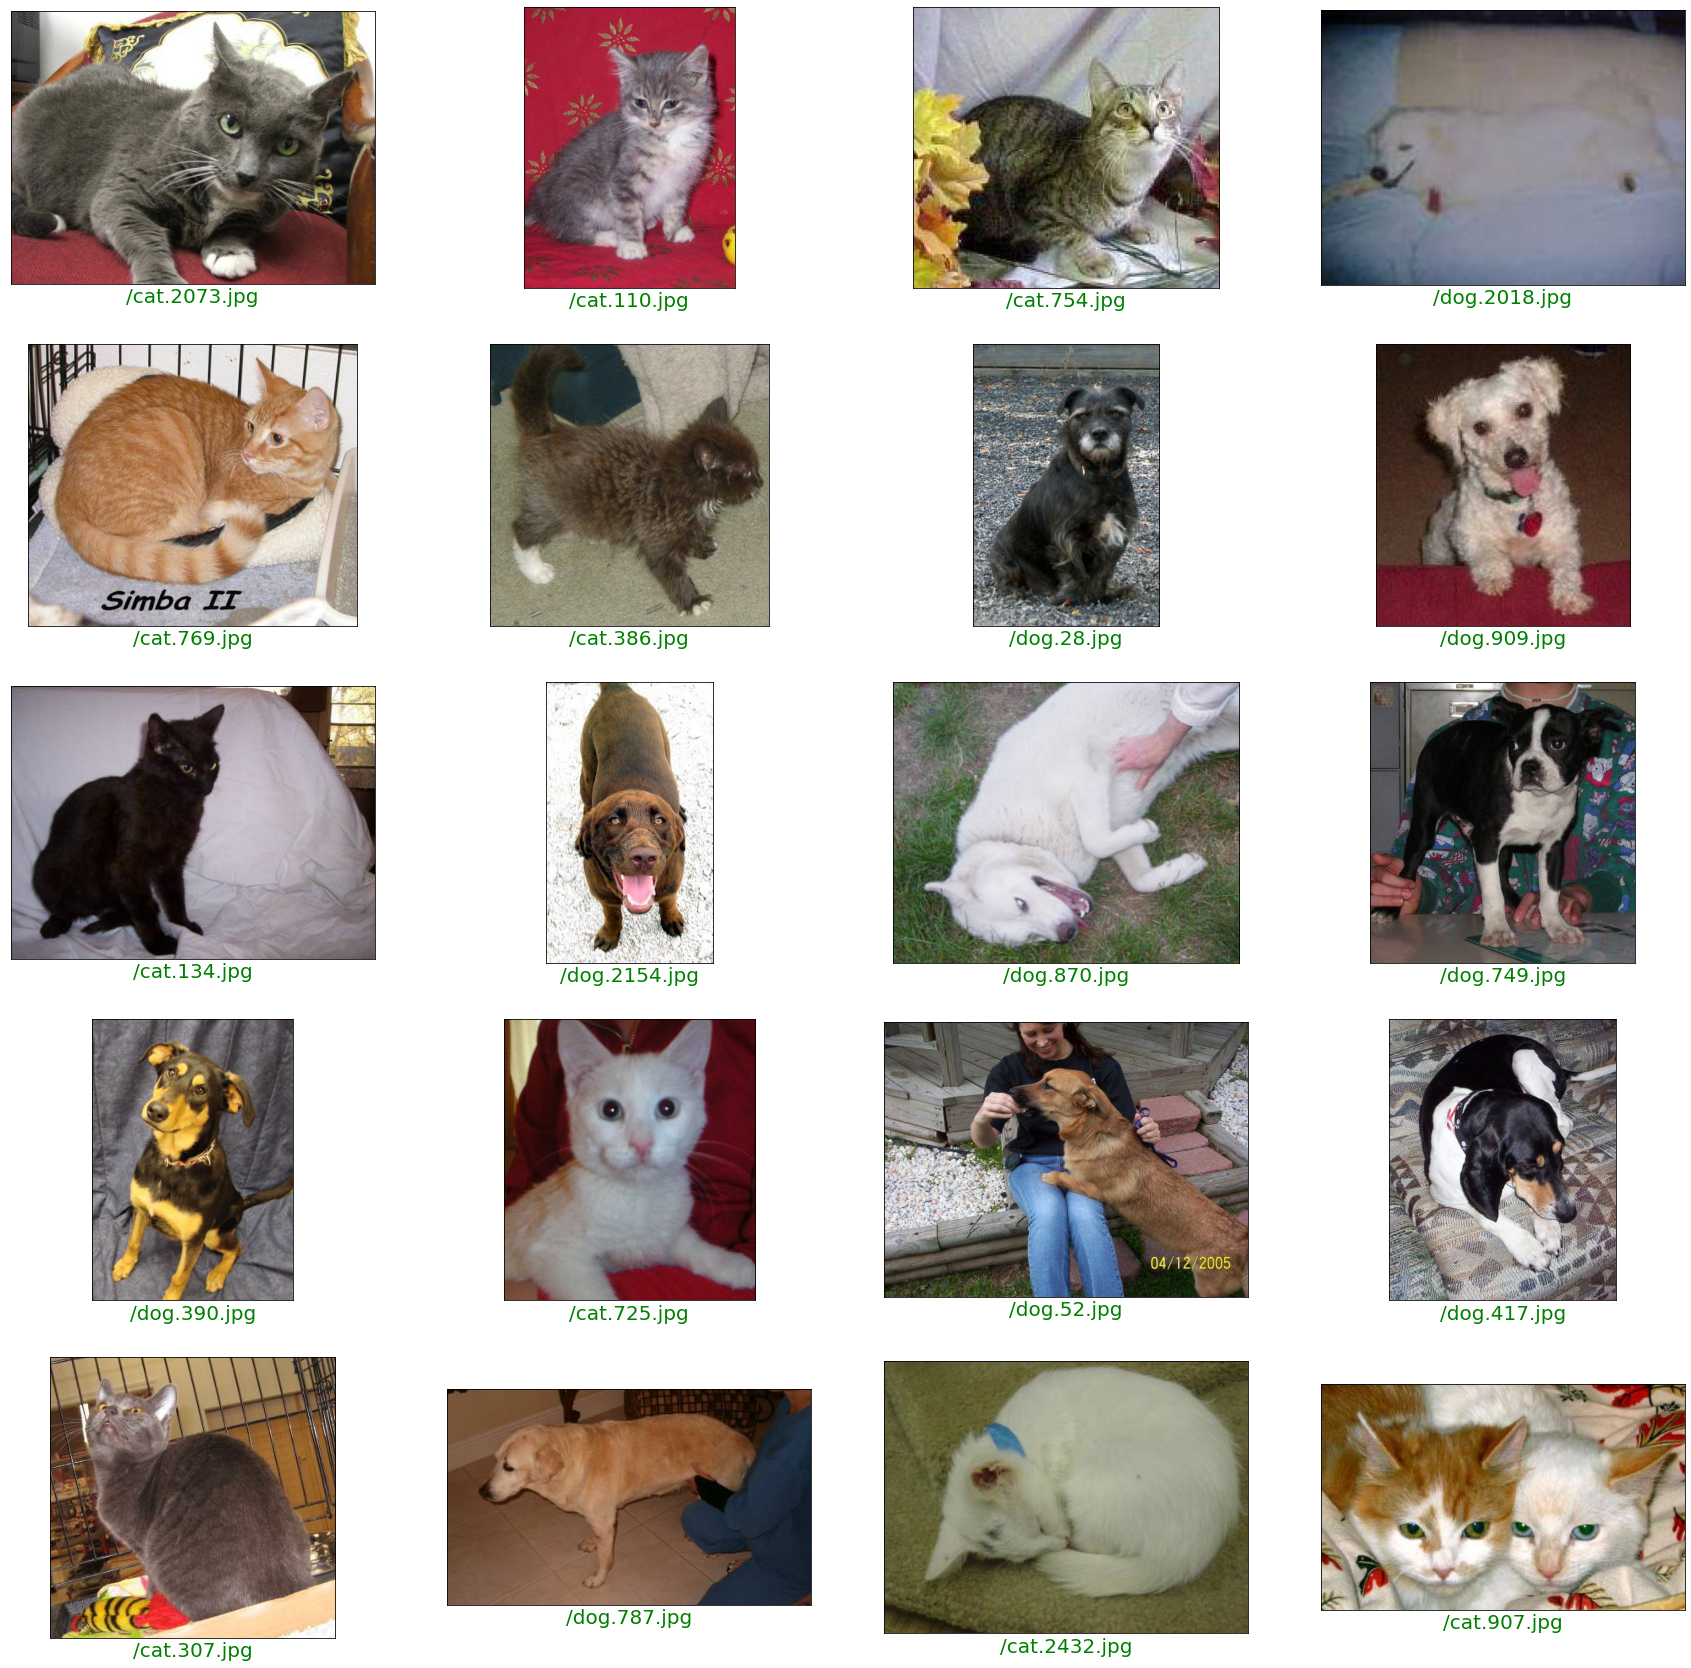

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

pic_index = 10
cats = np.random.permutation(os.listdir(TRAINING_CATS_DIR))
dogs = np.random.permutation(os.listdir(TRAINING_DOGS_DIR))

next_cats = [os.path.join(TRAINING_CATS_DIR, fname) for fname in cats[0:pic_index]]
next_dogs = [os.path.join(TRAINING_DOGS_DIR, fname) for fname in dogs[0:pic_index]]

plt.figure(figsize = (30, 30))
next_img = np.random.permutation(next_cats + next_dogs)
for i, img_path in enumerate(next_img):
    #print(img_path)
    plt.subplot(5, 4, i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(next_img[i][15:], color = 'green', fontsize=20)

plt.show()

## Task #3 : Create model from scratch

+ Creating a Keras Sequential model.
+ Creating a function to add a convolutional block to the model.
+ A look at the model summary.

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(filters = num_filters, kernel_size = (3,3), strides = (1, 1), activation='relu', padding = 'valid'))
        #model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (2, 2)))
        #model.add(Dropout(rate = 0.2))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (150, 150, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 64)
    
    model.add(Flatten())
    model.add(Dense(units = 512, activation = 'relu'))
    #model.add(Dropout(rate = 0.2))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    
    # Compile the model
    model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])
    
    return model

model = create_model()
model.summary()
        

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

## Task #4: Data Preprocessing

+ Buid image generator for training and testing set
+ Normalizes or rescale data
+ Initialize the bacth size
+ Using Callback to control training

In [10]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
#checkpointer = ModelCheckpoint(filepath="weights_.hdf5", verbose=1, save_best_only=True)

# Using Callback to control training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):
        if(log.get('val_accuracy') >= 0.98):
            print("\nReached {}% val_accuracy so cancelling training!".format(round(100 * log.get('val_accuracy'), 2)))
            self.model.stop_training = True
            
# callback instance
callbacks = myCallback()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization and validation_split
train_datagen = ImageDataGenerator(rescale = 1 / 255.0,
                                   validation_split = 0.1112)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

# Flow training images in batches of 128 using train_datagen generator
training_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,                # This is the source directory for training images
    target_size = (150, 150), # All images will be resized to 150x150
    batch_size = 20,
    subset = 'training',
    class_mode = 'binary')    # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  # This is the source directory for training images
        target_size = (150, 150),           # All images will be resized to 150x150
        batch_size = 20,
        subset = 'validation',
        class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
testing_generator = test_datagen.flow_from_directory(
        TESTING_DIR,  # This is the source directory for training images
        target_size = (150, 150),           # All images will be resized to 150x150
        batch_size = 20,
        class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


## Task #5: Train Model

+ Fit the model on the subset.
+ Setting the EarlyStopping callback.
+ Setting the ModelCheckpoint callback.

In [25]:
history = model.fit(
    training_generator,
    steps_per_epoch = training_generator.n // 20,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // 20,
    callbacks = [callbacks, earlystopping],
    verbose = 2
)

Epoch 1/30
120/120 - 57s - loss: 0.6848 - accuracy: 0.5508 - val_loss: 0.7097 - val_accuracy: 0.5133
Epoch 2/30
120/120 - 61s - loss: 0.6520 - accuracy: 0.6067 - val_loss: 0.6342 - val_accuracy: 0.6467
Epoch 3/30
120/120 - 60s - loss: 0.6204 - accuracy: 0.6642 - val_loss: 0.6174 - val_accuracy: 0.6500
Epoch 4/30
120/120 - 61s - loss: 0.5857 - accuracy: 0.6929 - val_loss: 0.5845 - val_accuracy: 0.6767
Epoch 5/30
120/120 - 64s - loss: 0.5593 - accuracy: 0.7092 - val_loss: 0.5583 - val_accuracy: 0.7200
Epoch 6/30
120/120 - 62s - loss: 0.5362 - accuracy: 0.7308 - val_loss: 0.5463 - val_accuracy: 0.7167
Epoch 7/30
120/120 - 66s - loss: 0.5214 - accuracy: 0.7375 - val_loss: 0.5342 - val_accuracy: 0.7467
Epoch 8/30
120/120 - 61s - loss: 0.5005 - accuracy: 0.7583 - val_loss: 0.5454 - val_accuracy: 0.7533
Epoch 9/30
120/120 - 63s - loss: 0.4813 - accuracy: 0.7696 - val_loss: 0.5121 - val_accuracy: 0.7300
Epoch 10/30
120/120 - 65s - loss: 0.4698 - accuracy: 0.7721 - val_loss: 0.5576 - val_accura

## Task #6 : Visualization of the Accuracy and Loss 

+ Creating a function to plot training and validation accuracy per epoch, then training and validation loss
+ Visualization training and validation accuracy
+ Visualize training and validation loss


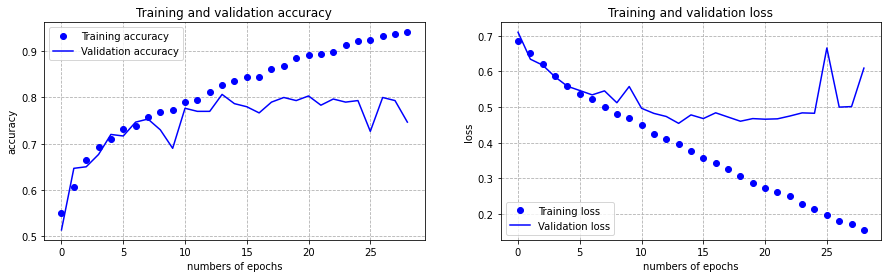

In [26]:
def graph_plot(history):
    """
    plot training and validation accuracy per epoch, then training and validation loss.
    
    Argument :
    - history : output of the trained model
    
    """
    #-----------------------------------------------------------
    # Retrieve a list of results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    num_epochs = range(len(train_acc)) # Get number of epochs
    
    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    import matplotlib.pyplot as plt
    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)
    plt.plot(num_epochs, train_acc, 'bo', label='Training accuracy')
    plt.plot(num_epochs, val_acc, 'b', label='Validation accuracy')
    plt.xlabel("numbers of epochs")
    plt.ylabel("accuracy")
    plt.grid(linestyle='--')
    plt.title('Training and validation accuracy')
    plt.legend()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.subplot(1, 2, 2)
    plt.plot(num_epochs, train_loss, 'bo', label='Training loss')
    plt.plot(num_epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel("numbers of epochs")
    plt.ylabel("loss")
    plt.grid(linestyle='--')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

graph_plot(history)


## Task #7 : Data Augmentation and Re-training of the model

+ Use Data Augmentation to improve the perfromances of the model and reduce overfitting
+ Re-training of the model
+ Visualize the impact of Data Augmentation

In [33]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization and validation_split
train_datagen = ImageDataGenerator(rescale = 1 / 255.0,
                                   rotation_range = 45,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   shear_range = 0.4,
                                   zoom_range = 0.4,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   validation_split = 0.1112)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

# Flow training images in batches of 128 using train_datagen generator
training_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,                # This is the source directory for training images
    target_size = (150, 150), # All images will be resized to 300x300
    batch_size = 20,
    subset = 'training',
    class_mode = 'binary')    # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  # This is the source directory for training images
        target_size = (150, 150),           # All images will be resized to 150x150
        batch_size = 20,
        subset = 'validation',
        class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
testing_generator = test_datagen.flow_from_directory(
        TESTING_DIR,  # This is the source directory for training images
        target_size = (150, 150),           # All images will be resized to 150x150
        batch_size = 20,
        class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [78]:
history2 = model.fit(
    training_generator,
    steps_per_epoch = training_generator.n // 20,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // 20,
    callbacks = [callbacks, earlystopping],
    verbose = 2
)

Epoch 1/20
120/120 - 67s - loss: 0.3932 - accuracy: 0.8242 - val_loss: 0.3783 - val_accuracy: 0.8467
Epoch 2/20
120/120 - 69s - loss: 0.3696 - accuracy: 0.8354 - val_loss: 0.3648 - val_accuracy: 0.8433
Epoch 3/20
120/120 - 69s - loss: 0.3998 - accuracy: 0.8200 - val_loss: 0.4152 - val_accuracy: 0.8300
Epoch 4/20
120/120 - 71s - loss: 0.3716 - accuracy: 0.8288 - val_loss: 0.3748 - val_accuracy: 0.8500
Epoch 5/20
120/120 - 67s - loss: 0.3964 - accuracy: 0.8325 - val_loss: 0.4517 - val_accuracy: 0.8100
Epoch 6/20
120/120 - 70s - loss: 0.3796 - accuracy: 0.8313 - val_loss: 0.3790 - val_accuracy: 0.8400
Epoch 7/20
120/120 - 67s - loss: 0.3723 - accuracy: 0.8388 - val_loss: 0.4969 - val_accuracy: 0.7833
Epoch 8/20
120/120 - 72s - loss: 0.3803 - accuracy: 0.8304 - val_loss: 0.3611 - val_accuracy: 0.8400
Epoch 9/20
120/120 - 70s - loss: 0.3778 - accuracy: 0.8346 - val_loss: 0.4146 - val_accuracy: 0.8167
Epoch 10/20
120/120 - 68s - loss: 0.3762 - accuracy: 0.8375 - val_loss: 0.5552 - val_accura

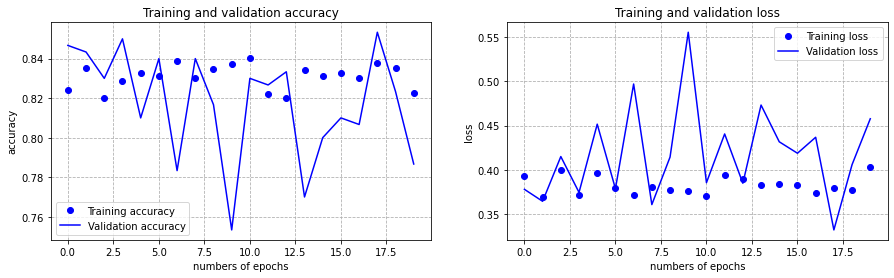

In [79]:
graph_plot(history2)

## Task #8 : Transfert Learning with Data Augmentation

Use transfert learning to improve performances of the model. We use the weights of a pre-trained InceptionV3 model on the ImageNet database for the transfer learning 

+ Import a model inception architecture and load the weigths file
+ Choice of a layer in the InceptionV3 Model
+ Building of the Model
+ Trained model
+ Visualization of the Accuracy and Loss for the Model

#### Import a model inception architecture and load the weigths file

In [33]:
from tensorflow.keras import layers, Model

# Import the inception model 
from tensorflow.keras.applications.inception_v3 import InceptionV3

weights_file = "./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

# Create an instance of the inception model
pre_trained_model = InceptionV3(
    include_top = False,
    input_shape = (150, 150, 3),
    weights = None
)

# Loading weights
pre_trained_model.load_weights(weights_file)

# Summary of the model
pre_trained_model.summary()

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = True

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

#### Choice of a layer in the InceptionV3 Model

We select one layer : for example `mixed8` layer.


In [35]:
# Select the layer
last_layer = pre_trained_model.get_layer('mixed8')

# Print the output shape of the layer
print('last layer output shape :',  last_layer.output_shape)

# Retrieve le output of the layer : tensor 4D
last_output = last_layer.output

last layer output shape : (None, 3, 3, 1280)


#### Building of the Model

We will use the Droupout layer to regularize the model

In [36]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)

# Add a fully connected layer with 1024 hidden units and ReLU activation
x = tf.keras.layers.Dense(units = 512, activation = 'relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(rate = 0.5)(x)

# Add a final sigmoid layer for classification
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

# Building of the model
model = Model(inputs = pre_trained_model.input, outputs = outputs)

# Compile the model
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])

# Summary
model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________

#### Data Augmentation

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization and validation_split
train_datagen = ImageDataGenerator(
    rescale = 1 / 255.0,
    rotation_range = 45,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.1112)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

# Flow training images in batches of 128 using train_datagen generator
training_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,                # This is the source directory for training images
    target_size = (150, 150), # All images will be resized to 300x300
    batch_size = 20,
    subset = 'training',
    class_mode = 'binary')    # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,  # This is the source directory for training images
    target_size = (150, 150),           # All images will be resized to 150x150
    batch_size = 20,
    subset = 'validation',
    class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

# Flow training images in batches of 128 using train_datagen generator
testing_generator = test_datagen.flow_from_directory(
    TESTING_DIR,  # This is the source directory for training images
    target_size = (150, 150),           # All images will be resized to 150x150
    batch_size = 20,
    class_mode ='binary')  # Since we use binary_crossentropy loss, we need binary labels

Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [38]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)

#save the best model with lower validation loss
#checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

# Using Callback to control training
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):
        if(log.get('val_accuracy') > 0.96):
            print("\nReached {}% val_accuracy so cancelling training!".format(round(100 * log.get('val_accuracy'), 2)))
            self.model.stop_training = True
            
# callback instance
callbacks = myCallback()

#### Training

In [39]:
history3 = model.fit(
    training_generator,
    steps_per_epoch = training_generator.n // 20,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // 20,
    callbacks = [callbacks, earlystopping],
    verbose = 2
)

Epoch 1/10
120/120 - 413s - loss: 0.4503 - accuracy: 0.7925 - val_loss: 0.3338 - val_accuracy: 0.8867
Epoch 2/10
120/120 - 413s - loss: 0.2744 - accuracy: 0.8858 - val_loss: 0.2382 - val_accuracy: 0.9067
Epoch 3/10
120/120 - 415s - loss: 0.2383 - accuracy: 0.9038 - val_loss: 0.7355 - val_accuracy: 0.8967
Epoch 4/10
120/120 - 413s - loss: 0.2259 - accuracy: 0.9146 - val_loss: 0.5365 - val_accuracy: 0.9067
Epoch 5/10
120/120 - 412s - loss: 0.1887 - accuracy: 0.9296 - val_loss: 0.3835 - val_accuracy: 0.9367
Epoch 00005: early stopping


In [ ]:
#load weights
#model.load_weights("weights_.hdf5")

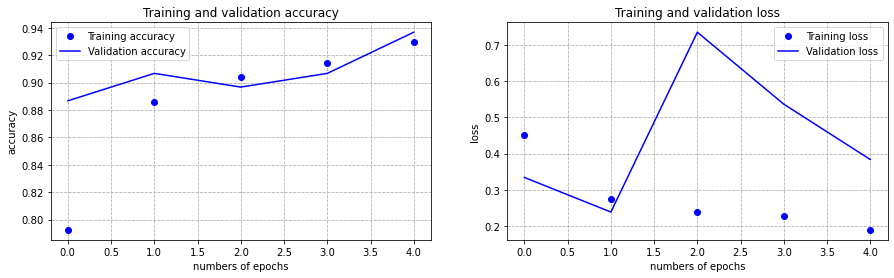

In [40]:
graph_plot(history3)

## Task #9 : Assess the performance of the trained model

+ Evaluate the performance of the model on data test
+ Evaluate score accuracy on data test
+ Visualizing the results
+ Print out the classification report and plot matrix confusion

In [49]:
# Evaluate the performance of the model
evaluate = model.evaluate(testing_generator, steps = testing_generator.n // 20, verbose = 2)

print('Accuracy Test : {}'.format(evaluate[1]))

15/15 - 8s - loss: 0.1496 - accuracy: 0.9700
Accuracy Test : 0.9700000286102295


In [50]:
# Check the number of images in the dataset
test = []
label = []

# os.listdir returns the list of files in the folder, in this case image class names
for i in  os.listdir('./testing'):
  test_class = os.listdir(os.path.join('testing', i))
  for j in test_class:
    img = os.path.join('./testing', i, j)
    test.append(img)
    label.append(i)

print('Number of train images : {} \n'.format(len(test)))


Number of train images : 300 



In [51]:
# Create Dataframe
test_df = pd.DataFrame({'Image': test, 'Labels': label})
test_df

Image Labels
0    ./testing\cats\cat.101.jpg   cats
1    ./testing\cats\cat.112.jpg   cats
2    ./testing\cats\cat.115.jpg   cats
3    ./testing\cats\cat.116.jpg   cats
4    ./testing\cats\cat.124.jpg   cats
..                          ...    ...
295  ./testing\dogs\dog.958.jpg   dogs
296   ./testing\dogs\dog.96.jpg   dogs
297  ./testing\dogs\dog.963.jpg   dogs
298   ./testing\dogs\dog.97.jpg   dogs
299  ./testing\dogs\dog.997.jpg   dogs

[300 rows x 2 columns]

In [75]:
from PIL.Image import open
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []
count = 0
label = {0:'cats', 1: 'dogs'}
a = []
b = []

for item in range(len(test_df)):
    # code to open the image
    img= open(test_df['Image'].tolist()[item])
    
    # resizing the image to (150,150)
    img = img.resize((150, 150))
    
    # appending image to the image list
    image.append(img)
    
    # converting image to array
    img = np.asarray(img, dtype= np.float32)
    
    # normalizing the image
    img = img / 255.0
    
    # reshaping the image in to a 4D array
    img = img.reshape(-1, 150, 150, 3)
    
    # making prediction of the model
    predict = model.predict(img)
    a.append(predict[0][0])
    
    # getting the index corresponding to the highest value in the prediction
    #index_predict = np.argmax(predict)    use it if the activate function is softmax
    index_predict = 0 if predict[0][0] < 0.5 else 1
    b.append(index_predict)
    
    # appending the predicted class to the list
    prediction.append(label[index_predict])
    
    # appending original class to the list
    original.append(test_df['Labels'].tolist()[item])
    

In [76]:
results = pd.DataFrame({'Original': original, 'Prediction': prediction, 'Probability': a, 'Class': b})
results

Original Prediction   Probability  Class
0       cats       cats  1.968018e-18      0
1       cats       cats  2.564942e-09      0
2       cats       cats  3.059364e-28      0
3       cats       cats  6.273518e-07      0
4       cats       cats  4.219905e-13      0
..       ...        ...           ...    ...
295     dogs       dogs  1.000000e+00      1
296     dogs       dogs  1.000000e+00      1
297     dogs       dogs  9.662517e-01      1
298     dogs       dogs  1.000000e+00      1
299     dogs       dogs  1.000000e+00      1

[300 rows x 4 columns]

In [77]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.9766666666666667


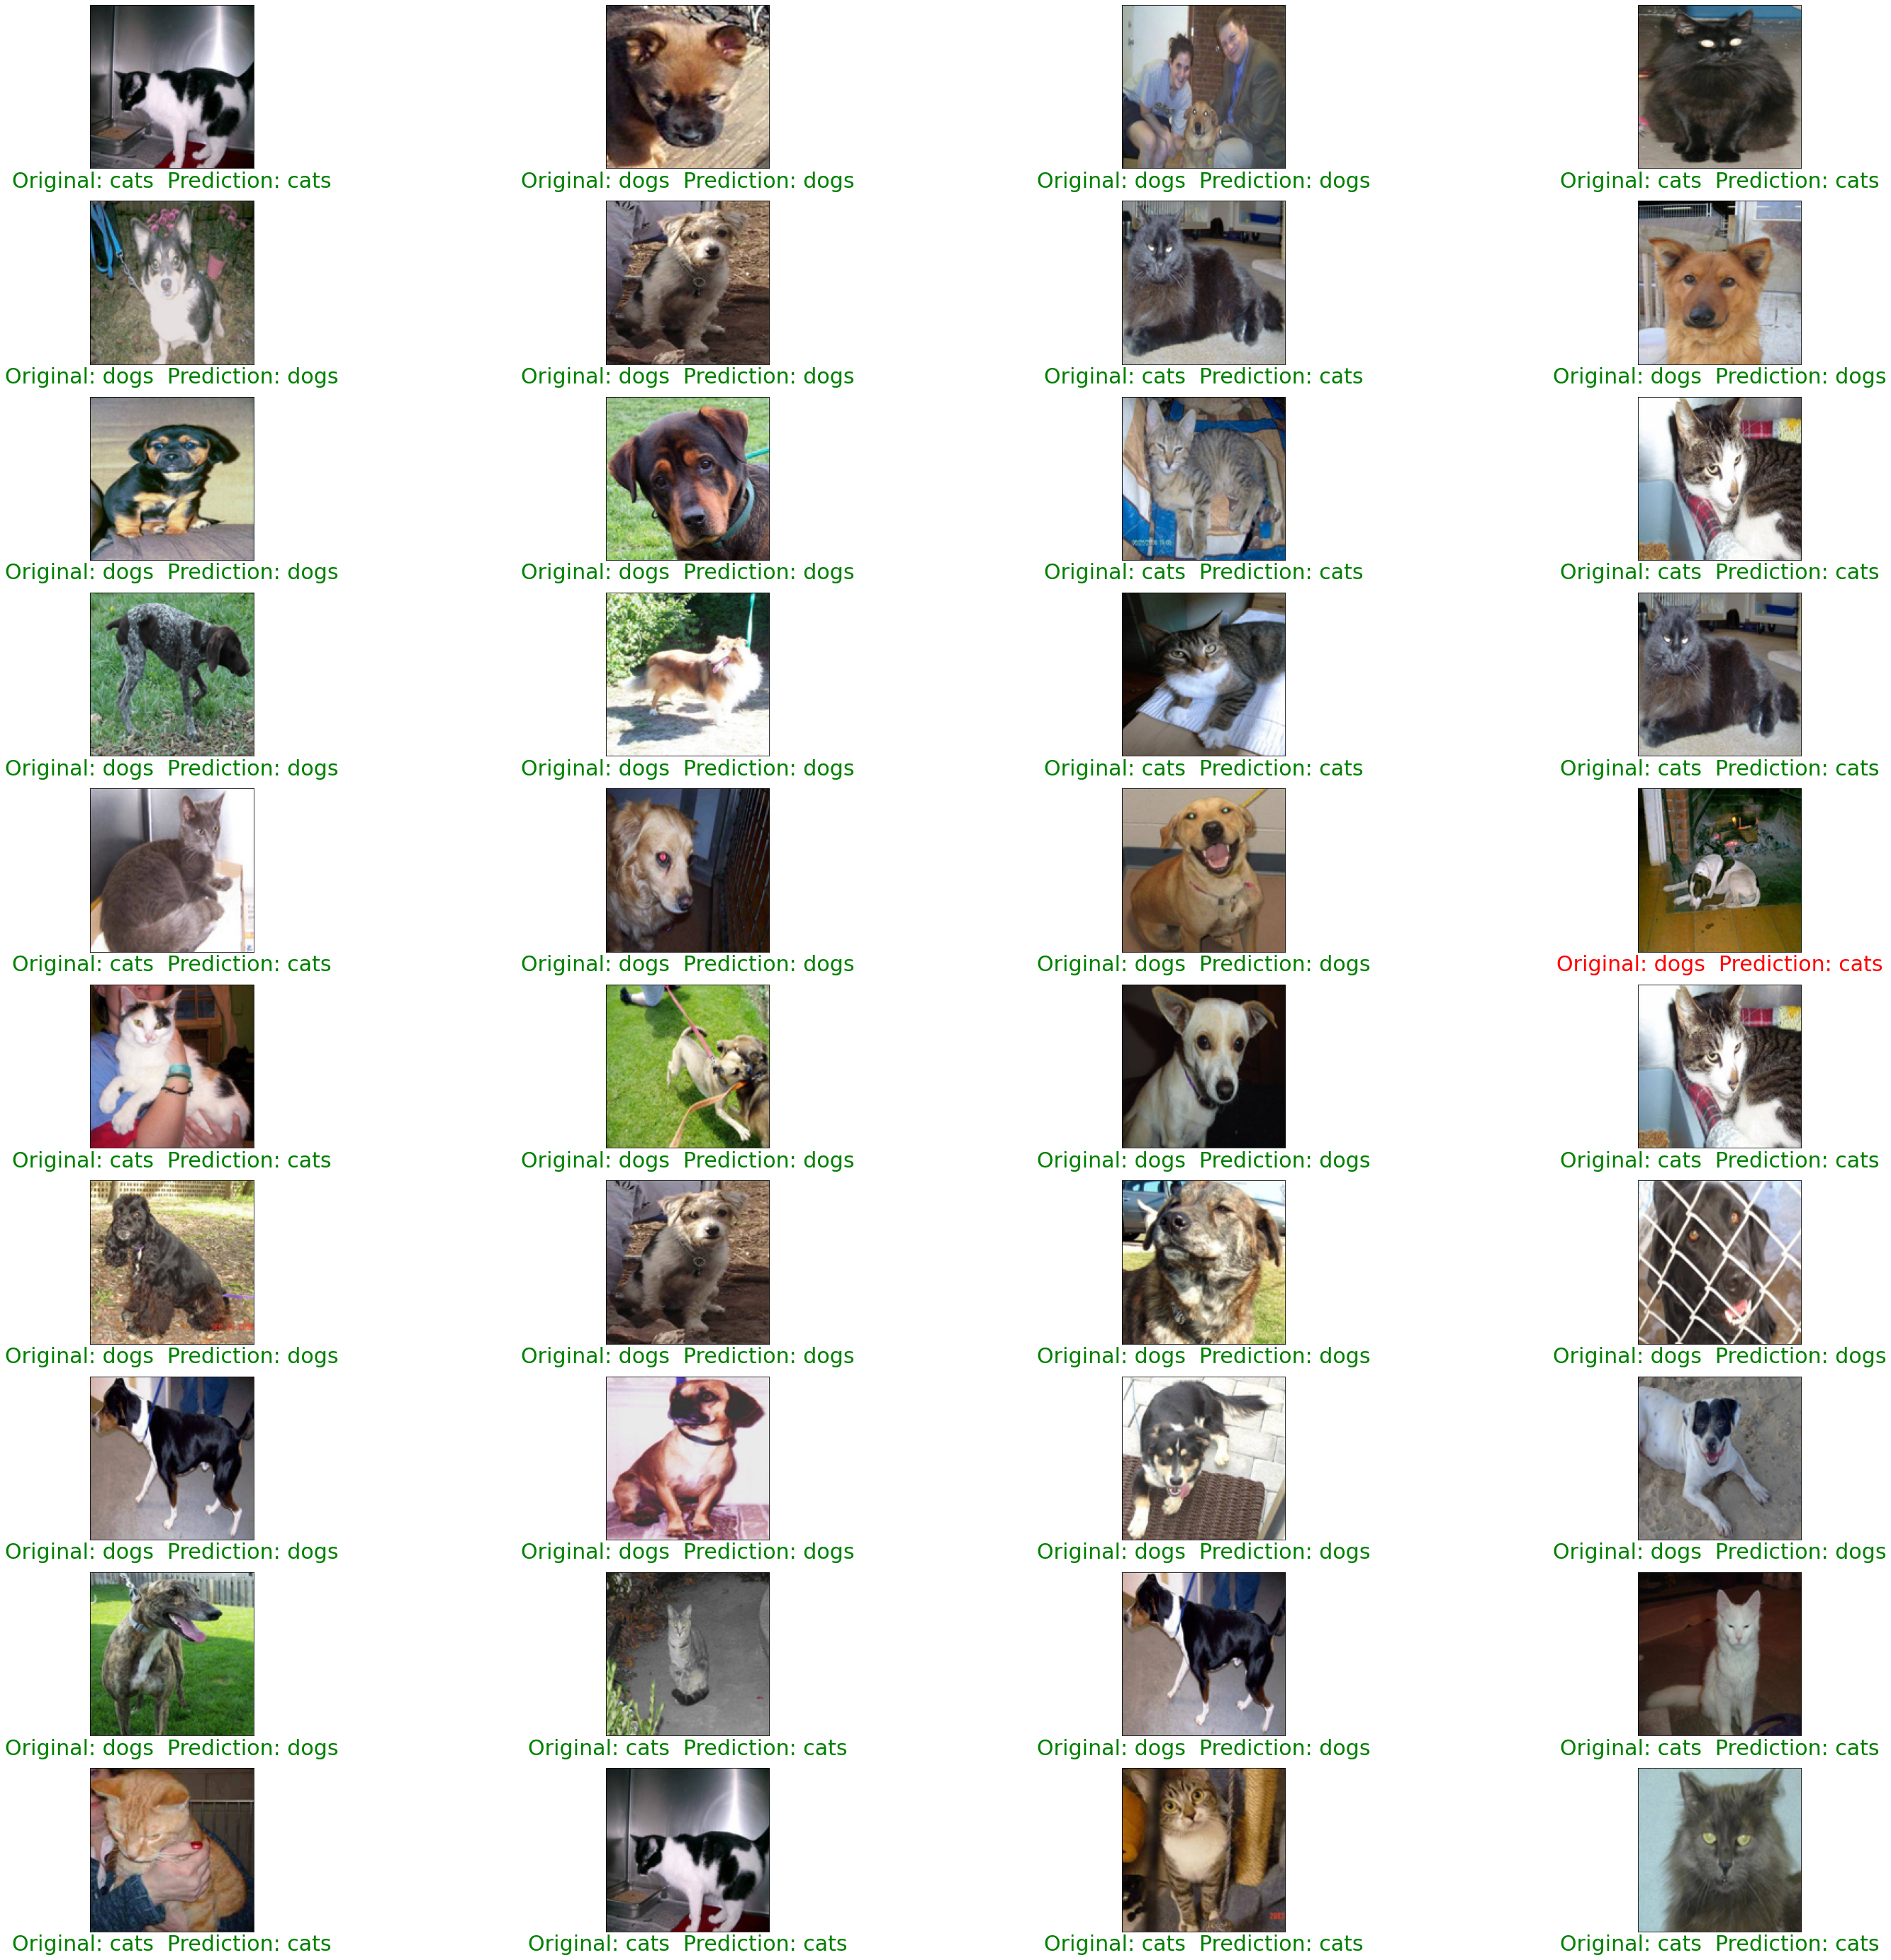

In [94]:
# Visualizing the results
import random
plt.figure(figsize = (50, 50))
for i in range(40):
    j = random.randint(0,len(image))
    plt.subplot(10, 4, i+1)
    col = 'green' if original[j] == prediction[j] else 'red'
    plt.xlabel("Original: " + original[j] + "  Prediction: " + prediction[j], fontsize = 30, color = col)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[j])
plt.show()


In [95]:
# Print out the classification report
print(classification_report(np.asarray(original), np.asarray(prediction)))


              precision    recall  f1-score   support

        cats       0.97      0.98      0.98       150
        dogs       0.98      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Text(0.5, 1.0, 'Confusion_matrix')

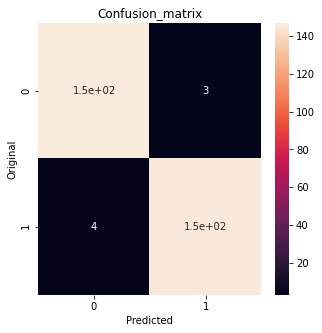

In [101]:
import seaborn as sns
# plot the confusion matrix
plt.figure(figsize = (5,5))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')